<a href="https://colab.research.google.com/github/sha863/Forecast-Data-Analysis/blob/main/Forecast_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
pd.set_option('display.max_rows', 500)
from scipy.stats.stats import pearsonr

from datetime import datetime
from datetime import date

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
# Import data
data=pd.read_excel(r"/content/drive/MyDrive/Forecast_Data_Interview_1 (1).xlsx")
data.head()

,Month,Product,Location,Quantity,Factor
0,201801,P10,C1,5,1
1,201801,P10,C2,12,0
2,201801,P13,C1,266,1
3,201801,P13,C2,142,6
4,201801,P16,C3,12,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     154 non-null    int64 
 1   Product   154 non-null    object
 2   Location  154 non-null    object
 3   Quantity  154 non-null    int64 
 4   Factor    154 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.1+ KB


In [4]:
data.describe()

,Month,Quantity,Factor
count,154.000000,154.000000,154.000000
mean,201837.512987,1380.837662,1.474026
std,45.414178,3924.722919,2.600146
min,201801.000000,1.000000,0.000000
25%,201805.000000,6.000000,0.000000
50%,201809.000000,19.000000,0.000000
75%,201902.000000,256.500000,2.000000
max,201906.000000,19982.000000,17.000000




*   We have total 154 rows in dataset and data consists of 2018 and 2019 years.

*   Quantity column contais 75 % Value under 256.5 having maximum value 19982.0 and Factor column contains 75% value under 2.0 having maximum value 17.0

* Further we need to dive deeper to get more idea about Quantity and Factor columns based on Product and Location


# Convert Month to date and extract year and month

In [5]:
#  Convert month to datetime format
data['date']=pd.to_datetime(data['Month'].astype(str), format='%Y%m')
# Drop Month Column
data.drop('Month', axis=1, inplace=True)
# Add year in data
data['year']=data['date'].dt.year
# Add Month into data
data['month']=data['date'].dt.month


In [6]:
data

,Product,Location,Quantity,Factor,date,year,month
0,P10,C1,5,1,2018-01-01,2018,1
1,P10,C2,12,0,2018-01-01,2018,1
2,P13,C1,266,1,2018-01-01,2018,1
3,P13,C2,142,6,2018-01-01,2018,1
4,P16,C3,12,4,2018-01-01,2018,1
5,P2,C3,32,4,2018-01-01,2018,1
6,P3,C5,16347,0,2018-01-01,2018,1
7,P7,C5,2903,0,2018-01-01,2018,1
8,P10,C1,7,0,2018-02-01,2018,2
9,P10,C2,12,0,2018-02-01,2018,2


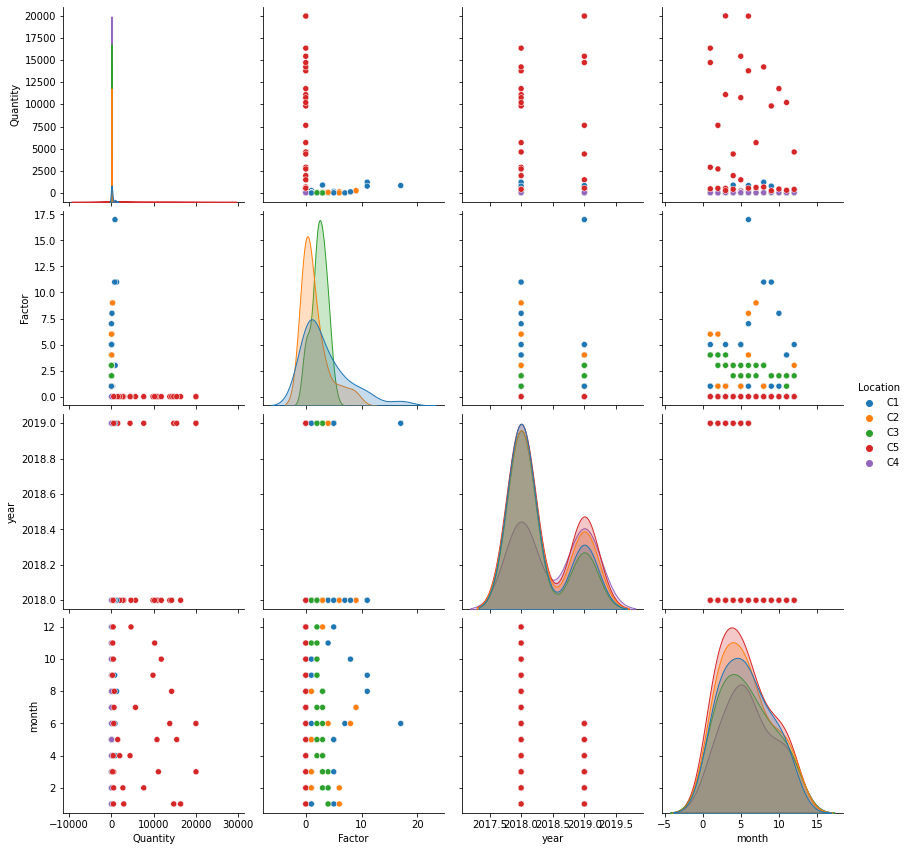

In [7]:
sns.pairplot(data, hue='Location', height=3 )
plt.show()



1.   Quantity VS Factor intersting


Since We have 2 Years 2018 and 2019 , I will Separate out the data of both the years and will do further EDA

In [8]:
data_2018=data[data['year']==2018]
data_2019=data[data['year']==2019]

In [9]:
data_2018.describe()

,Quantity,Factor,year,month
count,105.000000,105.000000,105.0,105.000000
mean,1194.380952,1.523810,2018.0,6.657143
std,3349.006731,2.511877,0.0,3.430151
min,1.000000,0.000000,2018.0,1.000000
25%,5.000000,0.000000,2018.0,4.000000
50%,19.000000,0.000000,2018.0,7.000000
75%,252.000000,2.000000,2018.0,10.000000
max,16347.000000,11.000000,2018.0,12.000000


In [10]:
data_2019.describe()

,Quantity,Factor,year,month
count,49.000000,49.000000,49.0,49.000000
mean,1780.387755,1.367347,2019.0,3.632653
std,4955.651323,2.803969,0.0,1.728365
min,1.000000,0.000000,2019.0,1.000000
25%,7.000000,0.000000,2019.0,2.000000
50%,19.000000,0.000000,2019.0,4.000000
75%,269.000000,2.000000,2019.0,5.000000
max,19982.000000,17.000000,2019.0,6.000000


In [11]:
data.describe(include='all')

<ipython-input-11-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Product,Location,Quantity,Factor,date,year,month
count,154,154,154.000000,154.000000,154,154.000000,154.000000
unique,8,5,NaN,NaN,18,NaN,NaN
top,P10,C5,NaN,NaN,2019-05-01 00:00:00,NaN,NaN
freq,32,36,NaN,NaN,10,NaN,NaN
first,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-06-01 00:00:00,NaN,NaN
mean,NaN,NaN,1380.837662,1.474026,NaN,2018.318182,5.694805
std,NaN,NaN,3924.722919,2.600146,NaN,0.467290,3.306417
min,NaN,NaN,1.000000,0.000000,NaN,2018.000000,1.000000
25%,NaN,NaN,6.000000,0.000000,NaN,2018.000000,3.000000


## Insights



1.   Data Contains Product, Quantity, Factor, Month and Location Columns with 155 rows where first one is header row.

2. Product Contains 8 distinct categories (P2,P3,P5,P7,10,P13,P14,P16)   

3. Loctaion Contains 5 distinct categories(C1,C2,C3,C4,C5)

4. factor Column contains values between (0-17) and 75 % Values are less than 2 with mean 1.47.

5. Quantity Column contains values between (1-19982) and 75 % Values are less than 256.5 with mean 1380

6. Need to conver Month column into date Column







*   Since we are interested on Location Level, we will list out following questions and try to answer them based on exploratory data analysis

1. Distribution of Location in data
2. Distribution of Quantity based on location
3. Distribution of factor Based on Location
4. Distribution of Product based on location










# Location Distribution

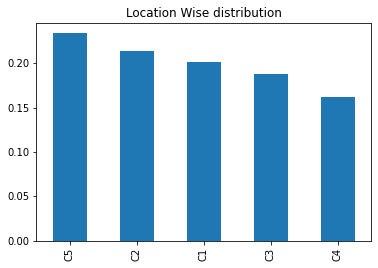

In [12]:
# Count of Location in dataset
data.Location.value_counts(normalize=True).plot(kind='bar',title='Location Wise distribution')
plt.show()

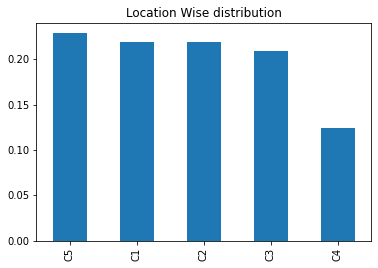

In [13]:
data_2018.Location.value_counts(normalize=True).plot(kind='bar',title='Location Wise distribution')
plt.show()

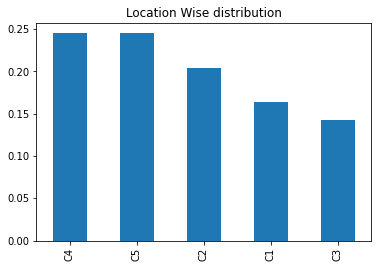

In [14]:
data_2019.Location.value_counts(normalize=True).plot(kind='bar',title='Location Wise distribution')
plt.show()

There is not so much distribution difference locationwise before and after splitting the data year wise 

# Sum of Quantity vs Location

In [15]:
px.histogram(data,y='Location',x='Quantity')


C5 Location have difference from other locations as Sum of Quantity is very much than other locations

In [16]:
px.histogram(data_2018,y='Location',x='Quantity')


In [17]:
px.histogram(data_2019,y='Location',x='Quantity')


Trend is similar after split out data also.

# Sum of Quantity vs product

In [18]:
px.histogram(data,y='Product',x='Quantity')


P3,P7,P13 Stands out in whole data

In [19]:
px.histogram(data_2018,y='Product',x='Quantity')


In [20]:
px.histogram(data_2019,y='Product',x='Quantity')

Trends are similar after spliting out dataset

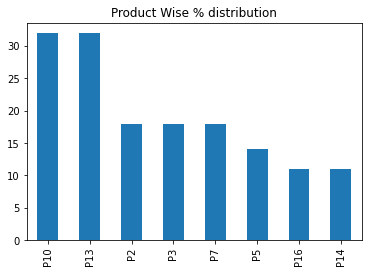

In [21]:
data.Product.value_counts().plot(kind='bar',title='Product Wise % distribution')
plt.show()

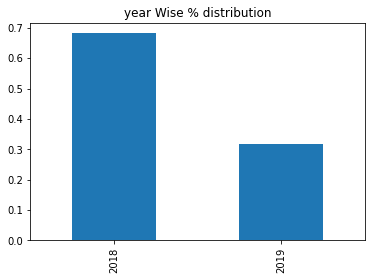

In [22]:
data.year.value_counts(normalize=True).plot(kind='bar',title='year Wise % distribution')
plt.show()

## Insights



1.   Tried to split out data yearwise found out that the trends/divisions are similar in both the years.

2.   ploted pair plot for each column in the data for further analysis

3. Sum of quantity is very much for location C5

4. Sum of Quantity is very much for P3 then P7 and P13

5. Now we found something intersting in terms of location and product categories and we will further dig down in these locations and Products

6. Now we will do EDA for factor.



# Factor Analysis

In [23]:
data['Factor'].describe()

count    154.000000
mean       1.474026
std        2.600146
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       17.000000
Name: Factor, dtype: float64

75 % Values are less than 2 

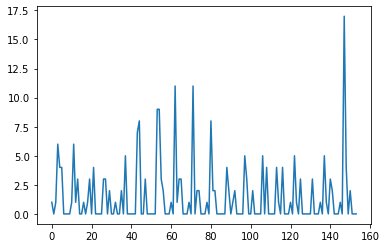

In [24]:
data['Factor'].plot()
plt.show()

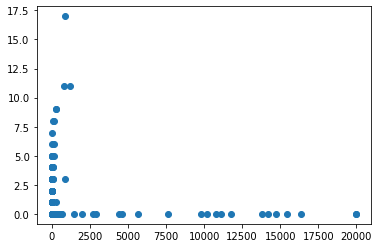

In [25]:
# Quantity and factor scatter plot
plt.scatter(data['Quantity'], data['Factor'] )
plt.show()

We have -0.16 correlation coefficient and P value is less than 0.05 that means correlation is statistically significant

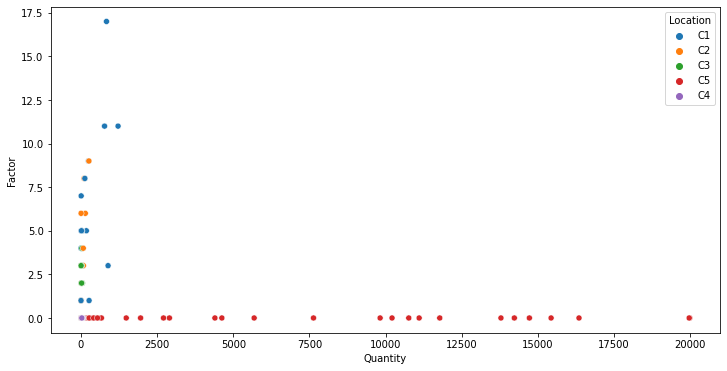

In [63]:
# Location wise Quantity and factor scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='Quantity', y='Factor', hue='Location')
plt.show()

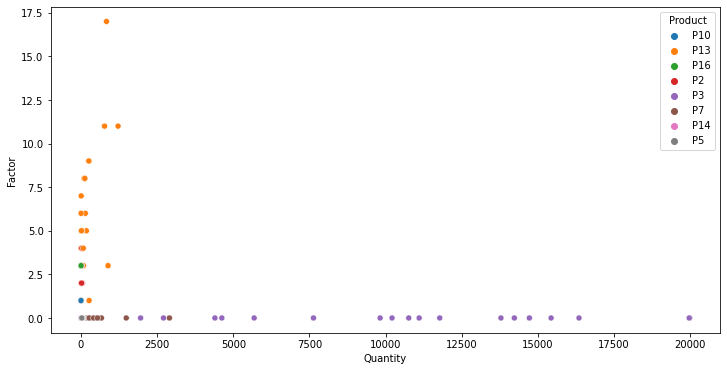

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='Quantity', y='Factor', hue='Product')
plt.show()

## Insights

1. We created a scatterplot for factor and quantity and further brokedown on locations.

2. C4 and C5 Locations have factor 0

3. Other Locations have mixed factors greater than 1 to range 17

4. P13 have factors greater than 0 and more in high range.


In [74]:
location_group=round(data.groupby(['Location']).mean(),2).reset_index()
location_group

,Location,Quantity,Factor,year,month
0,C1,160.26,3.42,2018.26,5.65
1,C2,28.15,1.58,2018.30,5.58
2,C3,21.21,2.38,2018.24,5.76
3,C4,19.12,0.00,2018.48,6.12
4,C5,5712.75,0.00,2018.33,5.50


<Figure size 864x432 with 0 Axes>

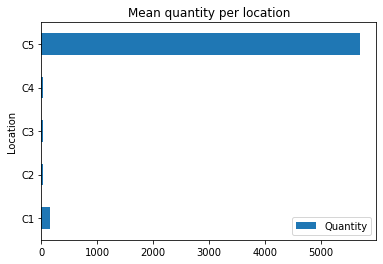

In [77]:
plt.figure(figsize=(12,6))
location_group.plot.barh('Location','Quantity', title='Mean quantity per location')
plt.show()

<Figure size 864x432 with 0 Axes>

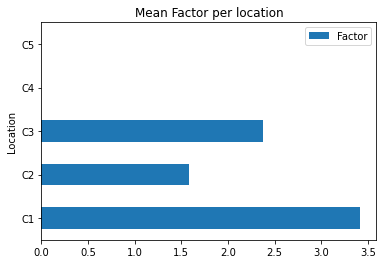

In [78]:
plt.figure(figsize=(12,6))
location_group.plot.barh('Location','Factor', title='Mean Factor per location')
plt.show()

In [29]:
round(data.groupby(['Product']).mean(),2)

,Quantity,Factor,year,month
Product,,,,
P10,8.31,0.28,2018.28,5.59
P13,175.97,4.66,2018.28,5.62
P14,8.64,0.00,2018.55,5.82
P16,3.82,1.55,2018.09,6.18
P2,31.83,2.89,2018.33,5.50
P3,10839.89,0.00,2018.33,5.50
P5,27.36,0.00,2018.43,6.36
P7,585.61,0.00,2018.33,5.50


In [102]:
loc_prod_group=round(data.groupby(['Location','Product']).mean(),2)
loc_prod_group=loc_prod_group.drop(['year','month'], axis=1)
loc_prod_group.columns=['mean_quantity','mean_factor']
loc_prod_group

mean_quantity  mean_factor
Location Product                            
C1       P10               3.21         0.64
         P13             289.59         5.71
C2       P10              12.28         0.00
         P13              47.20         3.47
C3       P16               3.82         1.55
         P2               31.83         2.89
C4       P14               8.64         0.00
         P5               27.36         0.00
C5       P3            10839.89         0.00
         P7              585.61         0.00

## Insights

1.   Each Location has 2 distinct Products
2.   C4 and C5 have factors 0
3.   (C5,P3) has very huge mean_quantity
4.   (C2,P10) have factors 0
5.   (C5, P7) and (C1, P13) have high mean_quantity



# Timeseries

In [33]:
# Setting date index
time_data= data.set_index('date')
time_data.head()

,Product,Location,Quantity,Factor,year,month
date,,,,,,
2018-01-01,P10,C1,5,1,2018,1
2018-01-01,P10,C2,12,0,2018,1
2018-01-01,P13,C1,266,1,2018,1
2018-01-01,P13,C2,142,6,2018,1
2018-01-01,P16,C3,12,4,2018,1


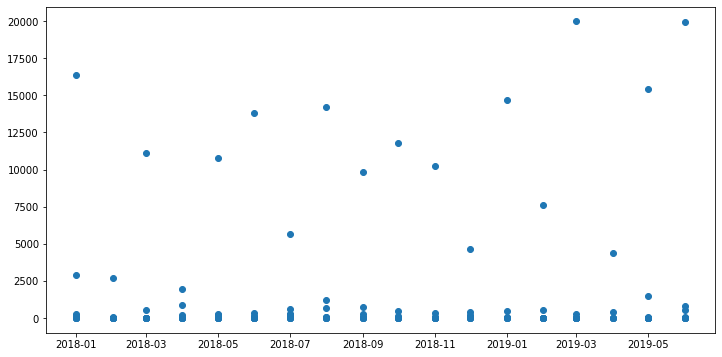

In [111]:
# Plot Quantity with date
plt.figure(figsize=(12,6))
plt.scatter(time_data.index,'Quantity', data=time_data,)
plt.show()

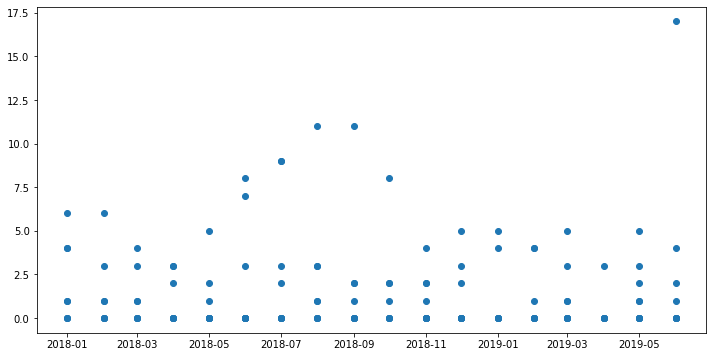

In [110]:
# Plot factor with date
plt.figure(figsize=(12,6))
plt.scatter(time_data.index,'Factor', data=time_data)
plt.show()

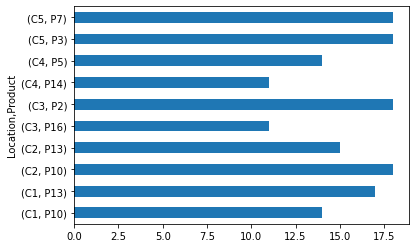

In [36]:
# Location and product count plot
loc_prod=data.groupby(['Location','Product']).size()
loc_prod.plot(kind='barh')
plt.show()

## Insights

From Above analysis Location C5 seems intersting hence we will create demand forecast model for both the products on same location.

# Building Model for C5 and P3

In [37]:
data_c5_p3=data[(data['Location']=='C5')& (data['Product']=='P3')].reset_index(drop=True)
data_c5_p3

,Product,Location,Quantity,Factor,date,year,month
0,P3,C5,16347,0,2018-01-01,2018,1
1,P3,C5,2709,0,2018-02-01,2018,2
2,P3,C5,11100,0,2018-03-01,2018,3
3,P3,C5,1956,0,2018-04-01,2018,4
4,P3,C5,10759,0,2018-05-01,2018,5
5,P3,C5,13785,0,2018-06-01,2018,6
6,P3,C5,5684,0,2018-07-01,2018,7
7,P3,C5,14225,0,2018-08-01,2018,8
8,P3,C5,9819,0,2018-09-01,2018,9
9,P3,C5,11776,0,2018-10-01,2018,10


In [39]:
# import Libraries and model
import warnings; 
warnings.simplefilter('ignore')
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751628 sha256=352da7b25e1bddf8b68a3e5b1dcc086ff23d0fba262aa2126d0de37fb1bf9ddf
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [40]:
data_c5_p3.drop(['Product', 'Location', 'year', 'month', 'Factor'], axis=1, inplace=True)
data_c5_p3.columns = ['y', 'ds']
data_c5_p3.head()

,y,ds
0,16347,2018-01-01
1,2709,2018-02-01
2,11100,2018-03-01
3,1956,2018-04-01
4,10759,2018-05-01


In [41]:
#  Fit model
m = Prophet(interval_width=0.95)
model = m.fit(data_c5_p3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


In [42]:
# Predictions for 15 Months
future = m.make_future_dataframe(periods=15,freq='M')
forecast = m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,8013.197496,-1956.347644,16930.778673,8013.197496,8013.197496,0.0,0.0,0.0,0.0,0.0,0.0,8013.197496
1,2018-02-01,8353.327046,-1159.182428,18218.590725,8353.327046,8353.327046,0.0,0.0,0.0,0.0,0.0,0.0,8353.327046
2,2018-03-01,8660.540832,-1184.360705,18258.386256,8660.540832,8660.540832,0.0,0.0,0.0,0.0,0.0,0.0,8660.540832
3,2018-04-01,9000.670382,-540.960112,18218.493967,9000.670382,9000.670382,0.0,0.0,0.0,0.0,0.0,0.0,9000.670382
4,2018-05-01,9329.828010,-1235.009861,18519.819653,9329.828010,9329.828010,0.0,0.0,0.0,0.0,0.0,0.0,9329.828010


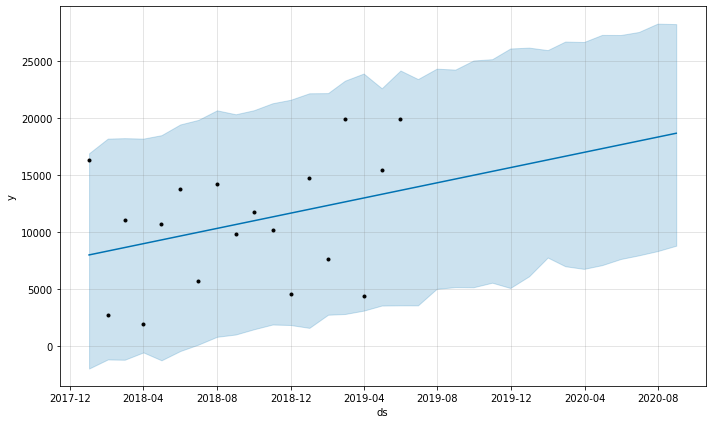

In [43]:
# Plot Predictions 
plot1 = m.plot(forecast)

# Building Model for C5 and P7

In [45]:
data_c5_p7=data[(data['Location']=='C5')& (data['Product']=='P7')].reset_index(drop=True)
data_c5_p7

,Product,Location,Quantity,Factor,date,year,month
0,P7,C5,2903,0,2018-01-01,2018,1
1,P7,C5,20,0,2018-02-01,2018,2
2,P7,C5,520,0,2018-03-01,2018,3
3,P7,C5,168,0,2018-04-01,2018,4
4,P7,C5,204,0,2018-05-01,2018,5
5,P7,C5,332,0,2018-06-01,2018,6
6,P7,C5,620,0,2018-07-01,2018,7
7,P7,C5,671,0,2018-08-01,2018,8
8,P7,C5,252,0,2018-09-01,2018,9
9,P7,C5,440,0,2018-10-01,2018,10


In [46]:
data_c5_p7.drop(['Product', 'Location', 'year', 'month', 'Factor'], axis=1, inplace=True)
data_c5_p7.columns = ['y', 'ds']
data_c5_p7.head()

,y,ds
0,2903,2018-01-01
1,20,2018-02-01
2,520,2018-03-01
3,168,2018-04-01
4,204,2018-05-01


In [47]:
m = Prophet(interval_width=0.95)
model = m.fit(data_c5_p7)

future = m.make_future_dataframe(periods=15,freq='M')
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,727.491350,-516.359593,1978.280600,727.491350,727.491350,0.0,0.0,0.0,0.0,0.0,0.0,727.491350
1,2018-02-01,711.133079,-442.706179,1935.171852,711.133079,711.133079,0.0,0.0,0.0,0.0,0.0,0.0,711.133079
2,2018-03-01,696.357867,-508.374175,1976.866915,696.357867,696.357867,0.0,0.0,0.0,0.0,0.0,0.0,696.357867
3,2018-04-01,679.999596,-586.518025,1896.347564,679.999596,679.999596,0.0,0.0,0.0,0.0,0.0,0.0,679.999596
4,2018-05-01,664.169011,-617.179276,1804.907218,664.169011,664.169011,0.0,0.0,0.0,0.0,0.0,0.0,664.169011


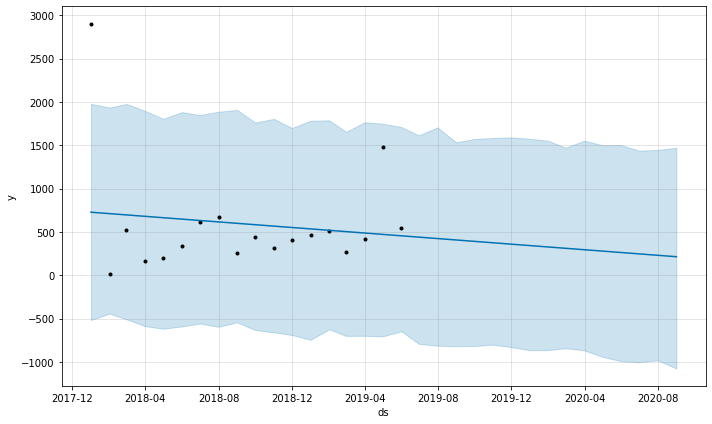

In [48]:
plot1 = m.plot(forecast)

# Other Locations

In [51]:
data.groupby(['Location','Product']).size()

Location  Product
C1        P10        14
          P13        17
C2        P10        18
          P13        15
C3        P16        11
          P2         18
C4        P14        11
          P5         14
C5        P3         18
          P7         18
dtype: int64

## C1

In [52]:
data_c1_p10=data[(data['Location']=='C1')& (data['Product']=='P10')].reset_index(drop=True)
data_c1_p10

,Product,Location,Quantity,Factor,date,year,month
0,P10,C1,5,1,2018-01-01,2018,1
1,P10,C1,7,0,2018-02-01,2018,2
2,P10,C1,4,1,2018-03-01,2018,3
3,P10,C1,3,0,2018-04-01,2018,4
4,P10,C1,1,1,2018-05-01,2018,5
5,P10,C1,2,0,2018-06-01,2018,6
6,P10,C1,4,0,2018-07-01,2018,7
7,P10,C1,4,1,2018-08-01,2018,8
8,P10,C1,4,1,2018-09-01,2018,9
9,P10,C1,2,1,2018-10-01,2018,10


In [53]:
data_c1_p13=data[(data['Location']=='C1')& (data['Product']=='P13')].reset_index(drop=True)
data_c1_p13

,Product,Location,Quantity,Factor,date,year,month
0,P13,C1,266,1,2018-01-01,2018,1
1,P13,C1,6,1,2018-02-01,2018,2
2,P13,C1,1,1,2018-03-01,2018,3
3,P13,C1,889,3,2018-04-01,2018,4
4,P13,C1,258,0,2018-05-01,2018,5
5,P13,C1,6,7,2018-06-01,2018,6
6,P13,C1,247,9,2018-07-01,2018,7
7,P13,C1,1217,11,2018-08-01,2018,8
8,P13,C1,773,11,2018-09-01,2018,9
9,P13,C1,128,8,2018-10-01,2018,10


Mixed Factors for both data

## C2

In [54]:
data_c2_p10=data[(data['Location']=='C2')& (data['Product']=='P10')].reset_index(drop=True)
data_c2_p10

,Product,Location,Quantity,Factor,date,year,month
0,P10,C2,12,0,2018-01-01,2018,1
1,P10,C2,12,0,2018-02-01,2018,2
2,P10,C2,6,0,2018-03-01,2018,3
3,P10,C2,19,0,2018-04-01,2018,4
4,P10,C2,16,0,2018-05-01,2018,5
5,P10,C2,14,0,2018-06-01,2018,6
6,P10,C2,15,0,2018-07-01,2018,7
7,P10,C2,3,0,2018-08-01,2018,8
8,P10,C2,6,0,2018-09-01,2018,9
9,P10,C2,13,0,2018-10-01,2018,10


In [55]:
data_c2_p13=data[(data['Location']=='C2')& (data['Product']=='P13')].reset_index(drop=True)
data_c2_p13

,Product,Location,Quantity,Factor,date,year,month
0,P13,C2,142,6,2018-01-01,2018,1
1,P13,C2,3,6,2018-02-01,2018,2
2,P13,C2,1,3,2018-03-01,2018,3
3,P13,C2,1,3,2018-04-01,2018,4
4,P13,C2,2,2,2018-05-01,2018,5
5,P13,C2,101,8,2018-06-01,2018,6
6,P13,C2,260,9,2018-07-01,2018,7
7,P13,C2,8,1,2018-08-01,2018,8
8,P13,C2,12,2,2018-10-01,2018,10
9,P13,C2,17,2,2018-11-01,2018,11


0 for one and mixed for other

## C3

In [56]:
data_c3_p16=data[(data['Location']=='C3')& (data['Product']=='P16')].reset_index(drop=True)
data_c3_p16

,Product,Location,Quantity,Factor,date,year,month
0,P16,C3,12,4,2018-01-01,2018,1
1,P16,C3,2,1,2018-02-01,2018,2
2,P16,C3,2,0,2018-03-01,2018,3
3,P16,C3,2,0,2018-04-01,2018,4
4,P16,C3,2,0,2018-06-01,2018,6
5,P16,C3,3,3,2018-07-01,2018,7
6,P16,C3,5,3,2018-08-01,2018,8
7,P16,C3,5,2,2018-09-01,2018,9
8,P16,C3,1,1,2018-11-01,2018,11
9,P16,C3,5,0,2018-12-01,2018,12


In [57]:
data_c3_p2=data[(data['Location']=='C3')& (data['Product']=='P2')].reset_index(drop=True)
data_c3_p2

,Product,Location,Quantity,Factor,date,year,month
0,P2,C3,32,4,2018-01-01,2018,1
1,P2,C3,45,3,2018-02-01,2018,2
2,P2,C3,29,4,2018-03-01,2018,3
3,P2,C3,32,2,2018-04-01,2018,4
4,P2,C3,37,5,2018-05-01,2018,5
5,P2,C3,33,3,2018-06-01,2018,6
6,P2,C3,39,2,2018-07-01,2018,7
7,P2,C3,64,3,2018-08-01,2018,8
8,P2,C3,45,2,2018-09-01,2018,9
9,P2,C3,30,2,2018-10-01,2018,10


Mixed For Both

## C4

In [58]:
data_c4_p14=data[(data['Location']=='C4')& (data['Product']=='P14')].reset_index(drop=True)
data_c4_p14

,Product,Location,Quantity,Factor,date,year,month
0,P14,C4,2,0,2018-05-01,2018,5
1,P14,C4,2,0,2018-06-01,2018,6
2,P14,C4,6,0,2018-09-01,2018,9
3,P14,C4,13,0,2018-11-01,2018,11
4,P14,C4,10,0,2018-12-01,2018,12
5,P14,C4,6,0,2019-01-01,2019,1
6,P14,C4,4,0,2019-02-01,2019,2
7,P14,C4,18,0,2019-03-01,2019,3
8,P14,C4,16,0,2019-04-01,2019,4
9,P14,C4,6,0,2019-05-01,2019,5


In [59]:
data_c4_p5=data[(data['Location']=='C4')& (data['Product']=='P5')].reset_index(drop=True)
data_c4_p5

,Product,Location,Quantity,Factor,date,year,month
0,P5,C4,8,0,2018-05-01,2018,5
1,P5,C4,28,0,2018-06-01,2018,6
2,P5,C4,12,0,2018-07-01,2018,7
3,P5,C4,35,0,2018-08-01,2018,8
4,P5,C4,69,0,2018-09-01,2018,9
5,P5,C4,15,0,2018-10-01,2018,10
6,P5,C4,18,0,2018-11-01,2018,11
7,P5,C4,45,0,2018-12-01,2018,12
8,P5,C4,23,0,2019-01-01,2019,1
9,P5,C4,8,0,2019-02-01,2019,2


0 For Both